In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('train.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [4]:
df = df.drop(df.loc[df['age'].isnull()].index)

In [5]:
df['sex']=df ['sex'].replace(['male'], '0')

df['sex']=df ['sex'].replace(['female'], '1')

In [6]:
df.drop('cabin',axis =1,inplace=True)

In [7]:
df.isna().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       2
dtype: int64

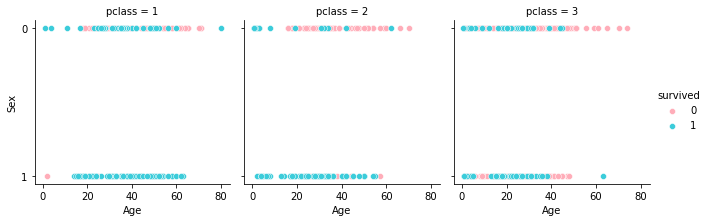

In [8]:
grid = sns.FacetGrid(data=df, col='pclass', hue='survived', palette=['#FFADB9', '#3BCCDA'] )
grid.map_dataframe(sns.scatterplot, x='age', y='sex')
grid.add_legend()
grid.set_xlabels("Age")
grid.set_ylabels("Sex")
sns.despine()


In [9]:
y = df['survived']
X = df.loc[:, df.columns != 'survived']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
X_train.shape

(535, 10)

In [12]:

X_test.shape

(179, 10)

In [18]:

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [30]:
transformer = make_column_transformer(
    # (preprocessing, [list of column names])
    (OneHotEncoder(sparse=False), ['sex']),
    (StandardScaler(), ['age', 'sex']),
    ('passthrough', ['pclass']))

In [20]:
transformer.fit(X_train)

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 ['sex']),
                                ('standardscaler', StandardScaler(),
                                 ['age', 'sex']),
                                ('passthrough', 'passthrough', ['pclass'])])

In [24]:

X_test_trans = transformer.transform(X_test)
X_train_trans = transformer.transform(X_train)

In [25]:
X_test_trans

array([[ 1.        ,  0.        , -1.41029856, -0.78194999,  3.        ],
       [ 0.        ,  1.        , -0.1119716 ,  1.27885417,  2.        ],
       [ 0.        ,  1.        ,  1.45968735,  1.27885417,  1.        ],
       [ 0.        ,  1.        , -0.79530158,  1.27885417,  3.        ],
       [ 0.        ,  1.        , -1.88862954,  1.27885417,  3.        ],
       [ 0.        ,  1.        ,  0.29802639,  1.27885417,  2.        ],
       [ 1.        ,  0.        ,  0.22969339, -0.78194999,  3.        ],
       [ 1.        ,  0.        ,  0.63969138, -0.78194999,  2.        ],
       [ 0.        ,  1.        ,  1.25468836,  1.27885417,  1.        ],
       [ 1.        ,  0.        ,  0.46885888, -0.78194999,  2.        ],
       [ 0.        ,  1.        ,  0.22969339,  1.27885417,  2.        ],
       [ 1.        ,  0.        ,  0.36635939, -0.78194999,  2.        ],
       [ 1.        ,  0.        , -0.1803046 , -0.78194999,  1.        ],
       [ 0.        ,  1.        , -0.3

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_trans, y_train)

LogisticRegression(max_iter=1000)

In [27]:
y_pred = model.predict(X_test_trans)


In [28]:
accuracy_score(y_pred, y_test)

0.8156424581005587

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier